# Credit Card Risk Prediction

<b>Loading Data</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
app_df = pd.read_csv("application_record.csv")
credit_df = pd.read_csv("credit_record.csv")


In [3]:
print(app_df.head(3))

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0          Working               Higher education   
1          427500.0          Working               Higher education   
2          112500.0          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0     Civil marriage   Rented apartment      -12005          -4542   
1     Civil marriage   Rented apartment      -12005          -4542   
2            Married  House / apartment      -21474          -1134   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1        

In [4]:
print(credit_df.head(3))

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0


In [5]:
print(app_df.shape)

(438557, 18)


In [6]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
credit_df.shape

(1048575, 3)

In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


# <b> Exploratory Data Analysis (EDA) <b/>

In [9]:
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [10]:
app_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [11]:
# dropping occupation type because of the null values
app_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [12]:
# checking for duplicates in 'ID' column
len(app_df['ID']) - len(app_df['ID'].unique())

47

In [13]:
# dropping duplicate entries from ID column
app_df = app_df.drop_duplicates('ID', keep='last')

In [14]:
# Checking Non-Numerical Columns
cat_columns = app_df.columns[(app_df.dtypes == 'object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [15]:
# Checking Numerical Columns
app_df.columns[(app_df.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [16]:
# Checking unique values from Categorical Columns

for i in app_df.columns[(app_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(app_df[i].value_counts())
    print('-----------------------------------------------')

CODE_GENDER 

F    294412
M    144098
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
NAME_FAMILY_STATUS 

Married                 299798
Single / not ma

In [17]:
# Checking unique values from Numerical Columns
app_df['CNT_CHILDREN'].value_counts()

0     304038
1      88518
2      39879
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [18]:
# Checking Min, Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', app_df['DAYS_BIRTH'].min(), '\nMax DAYS_BIRTH :', app_df['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


In [19]:
# Converting 'DAYS_BIRTH' values from Day to Years
app_df['DAYS_BIRTH'] = round(app_df['DAYS_BIRTH']/-365,0)
app_df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [20]:
# Checking unique values greater than 0
app_df[app_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243])

In [21]:
# When 'DAYS_EMPLOYED' is positive, it means person currently unemployed, hence replacing it with 0
app_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [22]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
app_df['DAYS_EMPLOYED'] = abs(round(app_df['DAYS_EMPLOYED']/-365,0))
app_df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)

In [23]:
app_df['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [24]:
# As all the values in column are 1, hence dropping column
app_df.drop('FLAG_MOBIL', axis=1, inplace=True)

In [25]:
app_df['FLAG_WORK_PHONE'].value_counts()

0    348118
1     90392
Name: FLAG_WORK_PHONE, dtype: int64

In [26]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
app_df.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [27]:
app_df['FLAG_PHONE'].value_counts()

0    312323
1    126187
Name: FLAG_PHONE, dtype: int64

In [28]:
# Dropping this column becuase it only contains 0 & 1 values
app_df.drop('FLAG_PHONE', axis=1, inplace=True)

In [29]:
app_df['FLAG_EMAIL'].value_counts()

0    391062
1     47448
Name: FLAG_EMAIL, dtype: int64

In [30]:
# Dropping rhis column because it only contains 0 & 1 values 
app_df.drop('FLAG_EMAIL', axis=1, inplace=True)

In [31]:
app_df['CNT_FAM_MEMBERS'].value_counts()

2.0     233867
1.0      84483
3.0      77119
4.0      37351
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [32]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


# <b> Visualization <b/>

<AxesSubplot:xlabel='CNT_CHILDREN'>

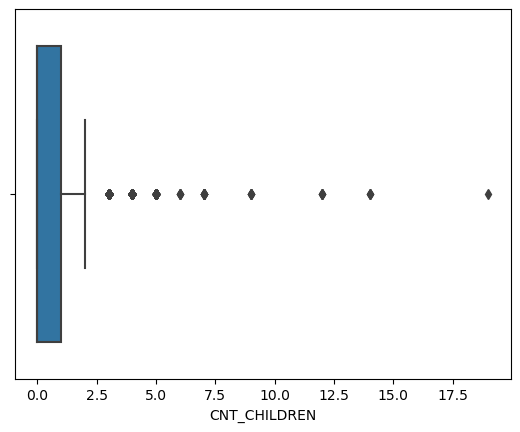

In [33]:
#Looking for outliers
sns.boxplot(app_df['CNT_CHILDREN'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

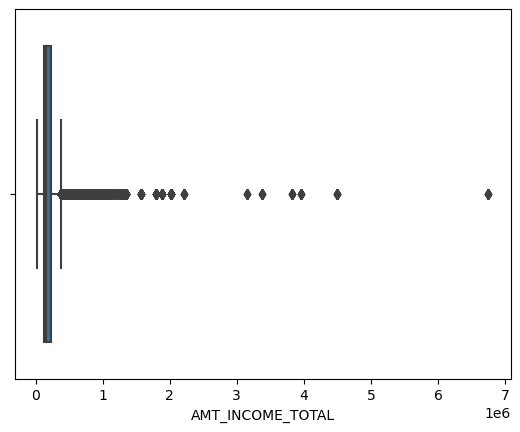

In [34]:
sns.boxplot(app_df['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AGE_YEARS'>

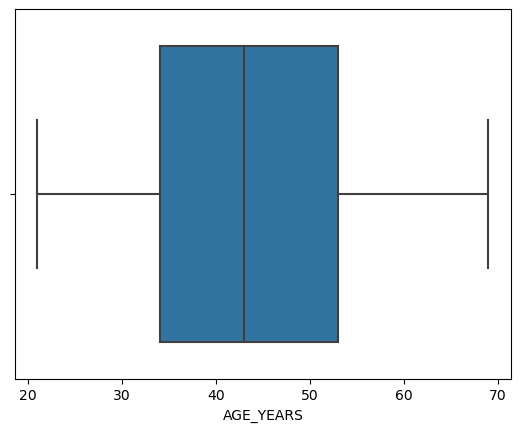

In [35]:
sns.boxplot(app_df['AGE_YEARS'])

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

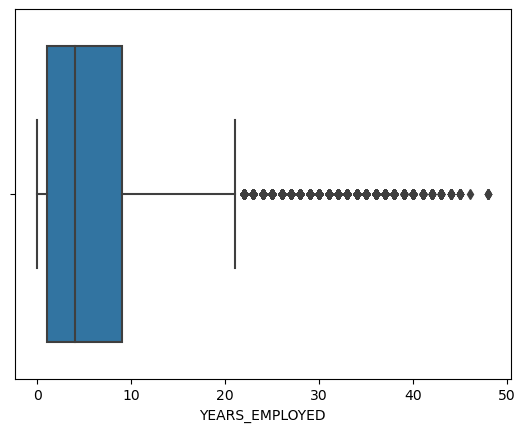

In [36]:
sns.boxplot(app_df['YEARS_EMPLOYED'])

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

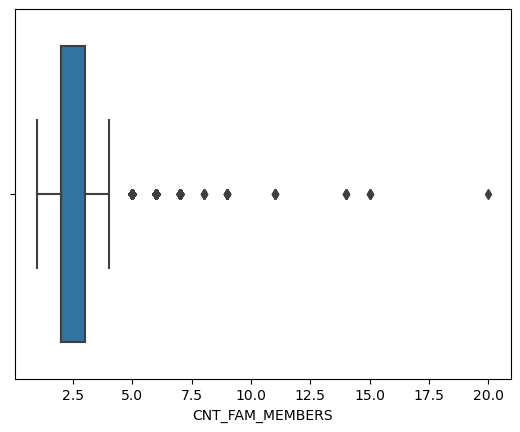

In [37]:
sns.boxplot(app_df['CNT_FAM_MEMBERS'])

<b> Removing Outliers <b/>

In [38]:
high_bound = app_df['CNT_CHILDREN'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_CHILDREN'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 4.0
low_bound : 0.0


In [39]:
app_df = app_df[(app_df['CNT_CHILDREN']>=low_bound) & (app_df['CNT_CHILDREN']<=high_bound)]

In [40]:
high_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['AMT_INCOME_TOTAL'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 990000.0
low_bound : 36000.0


In [41]:
app_df = app_df[(app_df['AMT_INCOME_TOTAL']>=low_bound) & (app_df['AMT_INCOME_TOTAL']<=high_bound)]

In [42]:
high_bound = app_df['YEARS_EMPLOYED'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['YEARS_EMPLOYED'].quantile(0.001)
print('low_bound :', low_bound)


high_bound : 40.0
low_bound : 0.0


In [43]:
app_df = app_df[(app_df['YEARS_EMPLOYED']>=low_bound) & (app_df['YEARS_EMPLOYED']<=high_bound)]

In [44]:
high_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.999)
print('high_bound :', high_bound)
low_bound = app_df['CNT_FAM_MEMBERS'].quantile(0.001)
print('low_bound :', low_bound)

high_bound : 6.0
low_bound : 1.0


In [45]:
app_df = app_df[(app_df['CNT_FAM_MEMBERS']>=low_bound) & (app_df['CNT_FAM_MEMBERS']<=high_bound)]

In [46]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


<b> Credit Record <b/>

In [47]:
credit_df.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [48]:
app_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
dtype: int64

In [49]:
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [50]:
# Category 'good' client (0) and 'bad' client (1) from 'STATUS' column
credit_df['STATUS'].replace(['C', 'X'],0, inplace=True)

In [51]:
credit_df['STATUS'].replace(['2','3','4','5'],1, inplace=True)

In [52]:
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

In [53]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [54]:
credit_df['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [55]:
credit_df_trans = credit_df.groupby('ID').agg(max).reset_index()

In [56]:
credit_df_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_df_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [57]:
credit_df_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

# <b> Merging Dataframes <b/>

In [58]:
# merging the two datasets based on 'ID'
final_df = pd.merge(app_df, credit_df_trans, on='ID', how='inner')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0


In [59]:
final_df.shape

(36326, 14)

In [60]:
# dropping 'ID' column as it is having only unique values (not required for ML Model)
final_df.drop('ID', axis=1, inplace=True)


In [61]:
# checking if there are still duplicate rows in Final Dataframe
len(final_df) - len(final_df.drop_duplicates())

25268

In [62]:
# Dropping duplicate records
final_df = final_df.drop_duplicates()
final_df.reset_index(drop=True ,inplace=True)

In [63]:
final_df.shape

(11058, 13)

In [64]:
final_df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [65]:
final_df['STATUS'].value_counts(normalize=True)*100

0    78.513294
1    21.486706
Name: STATUS, dtype: float64

# <b> Visualization <b/>

In [66]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2.0,0


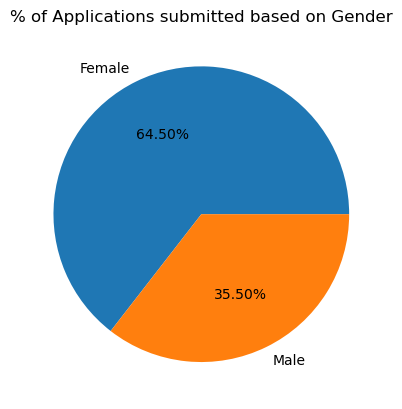

In [67]:
# Majority of the applicants are female
plt.pie(final_df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

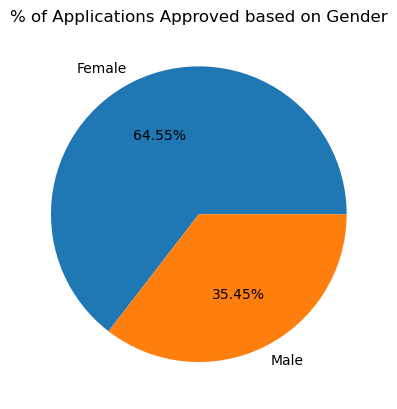

In [68]:
# Majority of approved application are Females
plt.pie(final_df[final_df['STATUS']==0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

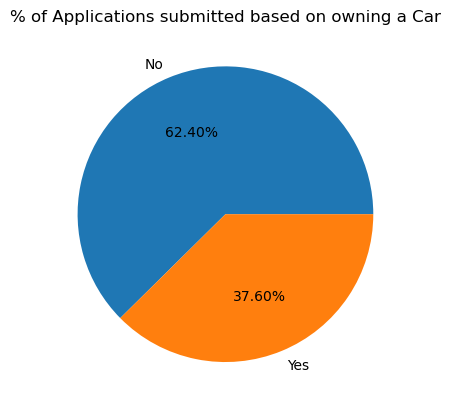

In [69]:
# Majority of applicants don't own a car
plt.pie(final_df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

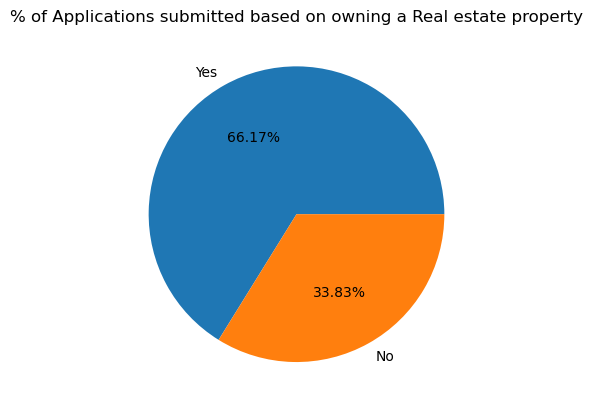

In [70]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.pie(final_df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

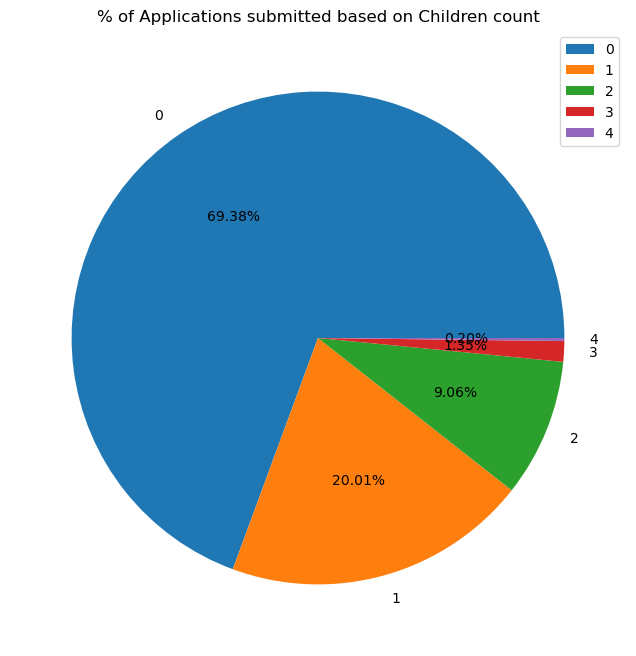

In [71]:
# Majority of applicants don't have any children
plt.figure(figsize = (8,8))
plt.pie(final_df['CNT_CHILDREN'].value_counts(), labels=final_df['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

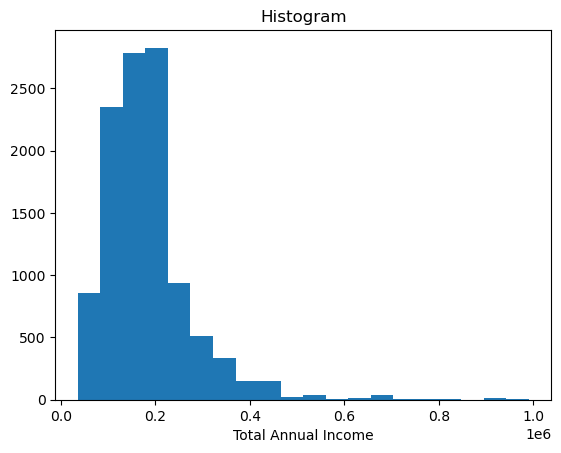

In [72]:
# Applicant Income Spread
plt.hist(final_df['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

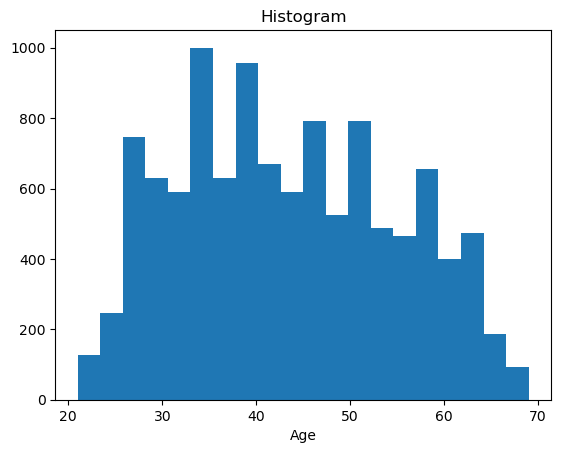

In [73]:
# Majority of applicants are between 25 to 65 years old
plt.hist(final_df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

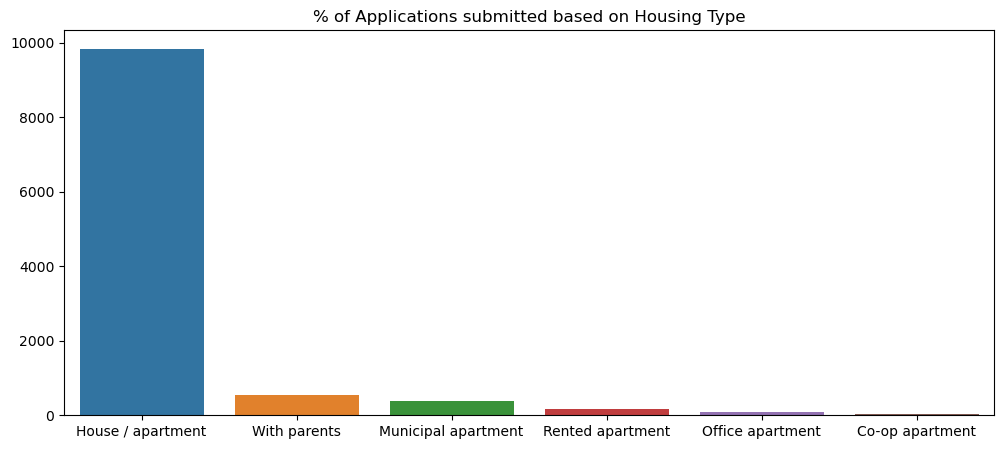

In [74]:
# Majority of applicants lives in House / Apartment
plt.figure(figsize=(12,5))
sns.barplot(final_df['NAME_HOUSING_TYPE'].value_counts().index, final_df['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()


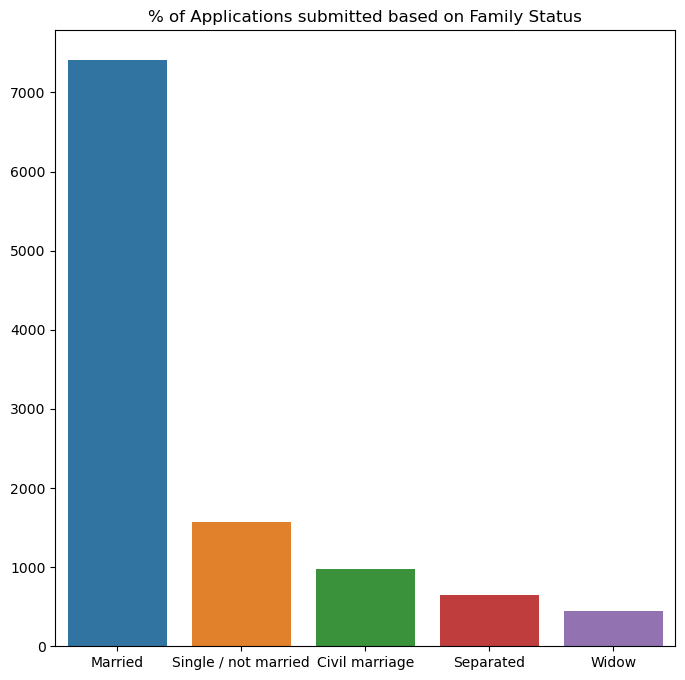

In [75]:
# Majority of applicants are married
plt.figure(figsize=(8,8))
sns.barplot(final_df['NAME_FAMILY_STATUS'].value_counts().index, final_df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

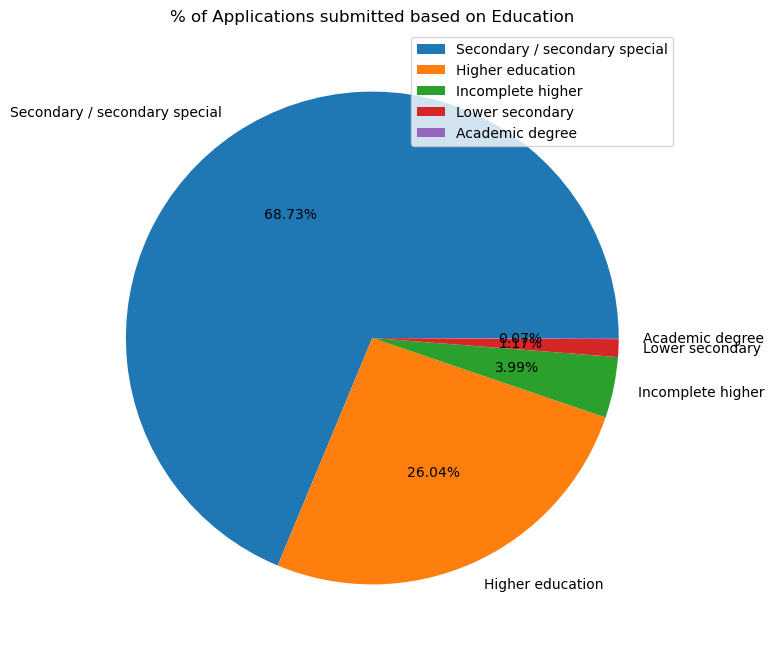

In [76]:
# Majority of applicants completed Secondary Education
plt.figure(figsize=(8,8))
plt.pie(final_df['NAME_EDUCATION_TYPE'].value_counts(), labels=final_df['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

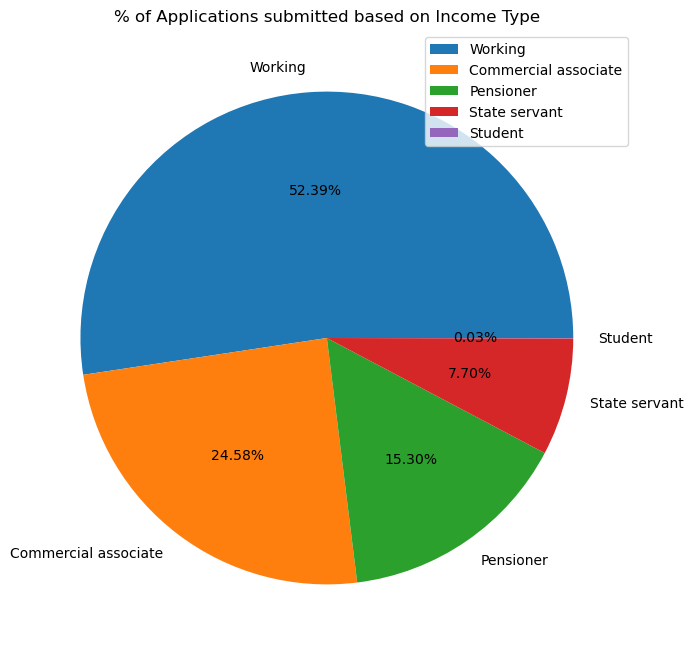

In [77]:
# Majority of applicants are working professional
plt.figure(figsize = (8,8))
plt.pie(final_df['NAME_INCOME_TYPE'].value_counts(), labels=final_df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

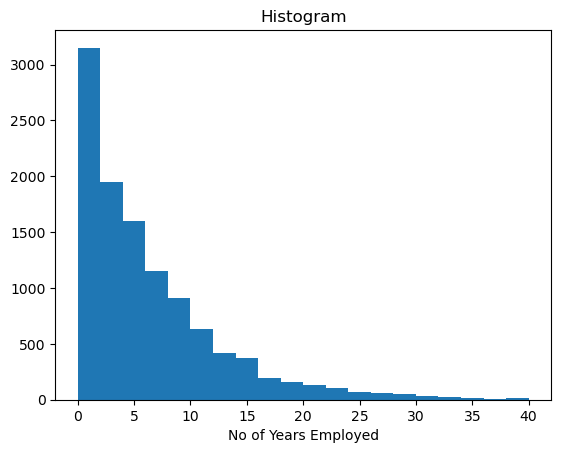

In [78]:
# Majority of applicants are Employed for 0 to 7 years
plt.hist(final_df['YEARS_EMPLOYED'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

# <b> Feature Selection <b/>

In [79]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2.0,0


In [80]:
cat_columns = final_df.columns[(final_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [81]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        final_df[col] = globals()['LE_{}'.format(col)].fit_transform(final_df[col])
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0,1
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
3,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0,0
4,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0,0


In [82]:
for col in cat_columns:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

CODE_GENDER   :  ['F' 'M']
FLAG_OWN_CAR   :  ['N' 'Y']
FLAG_OWN_REALTY   :  ['N' 'Y']
NAME_INCOME_TYPE   :  ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
NAME_EDUCATION_TYPE   :  ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS   :  ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
NAME_HOUSING_TYPE   :  ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']


In [83]:
final_df.corr()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
CODE_GENDER,1.000000,0.348307,-0.052647,0.052351,0.199358,0.072725,0.013080,-0.075315,0.052185,-0.157507,-0.043657,0.078853,0.002039
FLAG_OWN_CAR,0.348307,1.000000,-0.000126,0.087407,0.218026,0.030008,-0.085706,-0.125707,-0.011203,-0.106634,0.006570,0.138978,-0.003826
FLAG_OWN_REALTY,-0.052647,-0.000126,1.000000,0.001740,0.036549,-0.034673,0.003771,-0.011871,-0.178070,0.121351,-0.011665,0.009698,-0.022887
CNT_CHILDREN,0.052351,0.087407,0.001740,1.000000,0.027806,0.086772,-0.025059,-0.166742,0.010091,-0.326642,0.033979,0.884676,0.004820
AMT_INCOME_TOTAL,0.199358,0.218026,0.036549,0.027806,1.000000,-0.083800,-0.231827,-0.015623,-0.014723,-0.044799,0.079548,0.025272,0.020289
NAME_INCOME_TYPE,0.072725,0.030008,-0.034673,0.086772,-0.083800,1.000000,0.077636,-0.029347,0.036582,-0.191870,0.163301,0.080072,-0.002579
NAME_EDUCATION_TYPE,0.013080,-0.085706,0.003771,-0.025059,-0.231827,0.077636,1.000000,0.004787,-0.032365,0.145662,-0.016205,-0.021037,-0.006380
NAME_FAMILY_STATUS,-0.075315,-0.125707,-0.011871,-0.166742,-0.015623,-0.029347,0.004787,1.000000,0.039548,0.077175,-0.055202,-0.553865,0.003486
NAME_HOUSING_TYPE,0.052185,-0.011203,-0.178070,0.010091,-0.014723,0.036582,-0.032365,0.039548,1.000000,-0.219500,-0.041818,-0.022436,0.016156
AGE_YEARS,-0.157507,-0.106634,0.121351,-0.326642,-0.044799,-0.191870,0.145662,0.077175,-0.219500,1.000000,0.016587,-0.275968,-0.022945


In [84]:
features = final_df.drop(['STATUS'], axis=1)
label = final_df['STATUS']

In [85]:
features.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
3,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0
4,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0


In [86]:
label.head()

0    1
1    0
2    0
3    0
4    0
Name: STATUS, dtype: int64

# <b> Machine Learning <b/>

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state = 10)

In [88]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

print('Logistic Model Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Logistic Model Accuracy :  78.84267631103074 %

Confusion matrix :
[[1744    0]
 [ 468    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1744
           1       0.00      0.00      0.00       468

    accuracy                           0.79      2212
   macro avg       0.39      0.50      0.44      2212
weighted avg       0.62      0.79      0.70      2212



In [89]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction = decision_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Decision Tree Model Accuracy :  73.68896925858951 %

Confusion matrix :
[[1619  125]
 [ 457   11]]

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1744
           1       0.08      0.02      0.04       468

    accuracy                           0.74      2212
   macro avg       0.43      0.48      0.44      2212
weighted avg       0.63      0.74      0.68      2212



In [90]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train, y_train)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test, y_test)*100, '%')

prediction = RandomForest_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  78.84267631103074 %

Confusion matrix :
[[1744    0]
 [ 468    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1744
           1       0.00      0.00      0.00       468

    accuracy                           0.79      2212
   macro avg       0.39      0.50      0.44      2212
weighted avg       0.62      0.79      0.70      2212



In [91]:
# Support Vector Machine classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train, y_train)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test, y_test)*100, '%')

prediction = svc_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Support Vector Classifier Accuracy :  78.84267631103074 %

Confusion matrix :
[[1744    0]
 [ 468    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1744
           1       0.00      0.00      0.00       468

    accuracy                           0.79      2212
   macro avg       0.39      0.50      0.44      2212
weighted avg       0.62      0.79      0.70      2212



In [92]:
# K Nearest Neighbor classification

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(x_train, y_train)

print('KNN Model Accuracy : ', knn_model.score(x_test, y_test)*100, '%')

prediction = knn_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

KNN Model Accuracy :  76.58227848101265 %

Confusion matrix :
[[1684   60]
 [ 458   10]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1744
           1       0.14      0.02      0.04       468

    accuracy                           0.77      2212
   macro avg       0.46      0.49      0.45      2212
weighted avg       0.65      0.77      0.69      2212



In [93]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test, y_test)*100, '%')

prediction = XGB_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

XGBoost Model Accuracy :  75.72332730560579 %

Confusion matrix :
[[1664   80]
 [ 457   11]]

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1744
           1       0.12      0.02      0.04       468

    accuracy                           0.76      2212
   macro avg       0.45      0.49      0.45      2212
weighted avg       0.64      0.76      0.69      2212



# <b> Balancing Dataset <b/>

In [94]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [95]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [96]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    78.430929
1    21.569071
Name: STATUS, dtype: float64

In [97]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: STATUS, dtype: float64

# <b> Machine Learning Model after Balancing <b/>

In [98]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  52.15022935779816 %

Confusion matrix :
[[928 816]
 [853 891]]

Classification report:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53      1744
           1       0.52      0.51      0.52      1744

    accuracy                           0.52      3488
   macro avg       0.52      0.52      0.52      3488
weighted avg       0.52      0.52      0.52      3488



In [99]:
# Decision Tree classification

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = decision_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Decision Tree Model Accuracy :  73.88188073394495 %

Confusion matrix :
[[1570  174]
 [ 737 1007]]

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.78      1744
           1       0.85      0.58      0.69      1744

    accuracy                           0.74      3488
   macro avg       0.77      0.74      0.73      3488
weighted avg       0.77      0.74      0.73      3488



In [100]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  76.80619266055045 %

Confusion matrix :
[[1439  305]
 [ 504 1240]]

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1744
           1       0.80      0.71      0.75      1744

    accuracy                           0.77      3488
   macro avg       0.77      0.77      0.77      3488
weighted avg       0.77      0.77      0.77      3488



In [101]:
# Support Vector Machine classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train_oversam, y_train_oversam)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = svc_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Support Vector Classifier Accuracy :  49.42660550458716 %

Confusion matrix :
[[800 944]
 [820 924]]

Classification report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.48      1744
           1       0.49      0.53      0.51      1744

    accuracy                           0.49      3488
   macro avg       0.49      0.49      0.49      3488
weighted avg       0.49      0.49      0.49      3488



In [102]:
# K Nearest Neighbor classification

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(x_train_oversam, y_train_oversam)

print('KNN Model Accuracy : ', knn_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = knn_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

KNN Model Accuracy :  45.52752293577982 %

Confusion matrix :
[[ 886  858]
 [1042  702]]

Classification report:
              precision    recall  f1-score   support

           0       0.46      0.51      0.48      1744
           1       0.45      0.40      0.42      1744

    accuracy                           0.46      3488
   macro avg       0.45      0.46      0.45      3488
weighted avg       0.45      0.46      0.45      3488



In [103]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

XGBoost Model Accuracy :  84.23165137614679 %

Confusion matrix :
[[1650   94]
 [ 456 1288]]

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1744
           1       0.93      0.74      0.82      1744

    accuracy                           0.84      3488
   macro avg       0.86      0.84      0.84      3488
weighted avg       0.86      0.84      0.84      3488



# <b> Validation <b/>

K-Fold Cross Validation

In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

In [105]:
# Logistic Regression

results=cross_val_score(log_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[80.24412297 81.05786618 78.70705244 80.68747173 71.86793306] 

78.51288927710615


In [106]:
# Decision Tree classification

results=cross_val_score(decision_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[78.11934901 79.56600362 76.3562387  78.69742198 70.37539575] 

76.6228818099213


In [107]:
# Random Forest classification

results=cross_val_score(RandomForest_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[80.24412297 81.05786618 78.70705244 80.68747173 71.86793306] 

78.51288927710615


In [108]:
# Support Vector Machine classification

results=cross_val_score(svc_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[80.24412297 81.05786618 78.70705244 80.68747173 71.86793306] 

78.51288927710615


In [109]:
# K Nearest Neighbor classification

results=cross_val_score(knn_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)

[78.97830018 79.92766727 77.93851718 79.28539123 71.50610583] 

77.5271963378897


In [110]:
# XGBoost classification

results=cross_val_score(XGB_model,features,label,cv=kfold)
print(results*100,'\n')

print(np.mean(results)*100)


[79.70162749 80.37974684 78.02893309 80.00904568 71.64179104] 

77.95222882791369


<b> Stratified Shuffle Split <b/>

In [111]:
from sklearn.model_selection import StratifiedShuffleSplit
ssplit=StratifiedShuffleSplit(n_splits=5,test_size=0.30)

In [112]:
# Logistic Regression

results=cross_val_score(log_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[78.5111513 78.5111513 78.5111513 78.5111513 78.5111513] 

78.51115129596143


In [113]:
# Decision Tree classification

results=cross_val_score(decision_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[76.00964436 73.35744424 72.93550332 74.4424352  73.83966245] 

74.11693791440628


In [114]:
# Random Forest classification

results=cross_val_score(RandomForest_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[78.5111513 78.5111513 78.5111513 78.5111513 78.5111513] 

78.51115129596143


In [115]:
# Support Vector Machine classification

results=cross_val_score(svc_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)


[78.5111513 78.5111513 78.5111513 78.5111513 78.5111513] 

78.51115129596143


In [116]:
# K Nearest Neighbor classification

results=cross_val_score(knn_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[76.37130802 76.25075347 76.13019892 76.2808921  76.40144665] 

76.28691983122364


In [117]:
# XGBoost classification

results=cross_val_score(XGB_model,features,label,cv=ssplit)
print(results*100,'\n')

print(np.mean(results)*100)

[75.46714888 74.89451477 75.04520796 75.19590115 75.04520796] 

75.12959614225437


# <b> Conclusion <b/>

XGBoost Model is giving highest accuracy of 84.14 %, XGBoost Model is the best model for prediction 